### all data used from Frost et al., 2001

In [253]:
import numpy as np
import pandas as pd
import os
import pickle
import utm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [254]:
class_major = pd.read_excel("../_PETRO/classification_workdata.xlsx", index_col=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26])

## Fe-number


### FeO/(FeO+MgO) = 0.446+ 0.0046 * wt% SiO2 --> from Miyasiro, 1970

In [255]:
class_major["FeO/(FeO+MgO)"] = class_major["FeO"]/(class_major["FeO"]+class_major["MgO"])
class_major["Miyashiro value"] = 0.446 + 0.0046 * class_major["SiO2"]
class_major["Fe-miyashiro"] = class_major["FeO/(FeO+MgO)"] - class_major["Miyashiro value"]

In [256]:
bins = [-99, 0, 99]
cats = ["magnesian", "ferroan"]
class_major["Fe-number"] = pd.cut(class_major["Fe-miyashiro"], bins=bins, labels=cats)

In [257]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,P2O5,l.i.,oth,sum,hs,time,FeO/(FeO+MgO),Miyashiro value,Fe-miyashiro,Fe-number
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,0.009975,0.349127,0.009975,100.0,0.01,K2,0.811321,0.816753,-0.005432,magnesian
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,0.050171,0.501706,0.010034,100.0,0.01,Tr,0.583333,0.815255,-0.231922,magnesian
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.009996,1.019592,0.079968,100.0,0.30,K2,0.935135,0.813485,0.121650,ferroan
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,0.009931,0.258218,0.009931,100.0,0.01,K1,0.625000,0.809879,-0.184879,magnesian
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,0.009940,1.739563,0.159046,100.0,0.28,K1,0.981132,0.808056,0.173076,ferroan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,0.588705,1.476751,0.009978,100.0,0.30,K1,0.567352,0.680498,-0.113147,magnesian
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,0.259326,0.797925,0.009974,100.0,0.01,K2,0.639403,0.679533,-0.040130,magnesian
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,0.468267,1.484507,0.029889,100.0,0.47,J3,0.471971,0.676985,-0.205014,magnesian
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,0.458167,2.589641,0.009960,100.0,0.47,K2,0.604920,0.676641,-0.071721,magnesian


In [258]:
SiO2 = np.arange(0, 101, 1)

Text(0.5, 1.0, 'Fe-number')

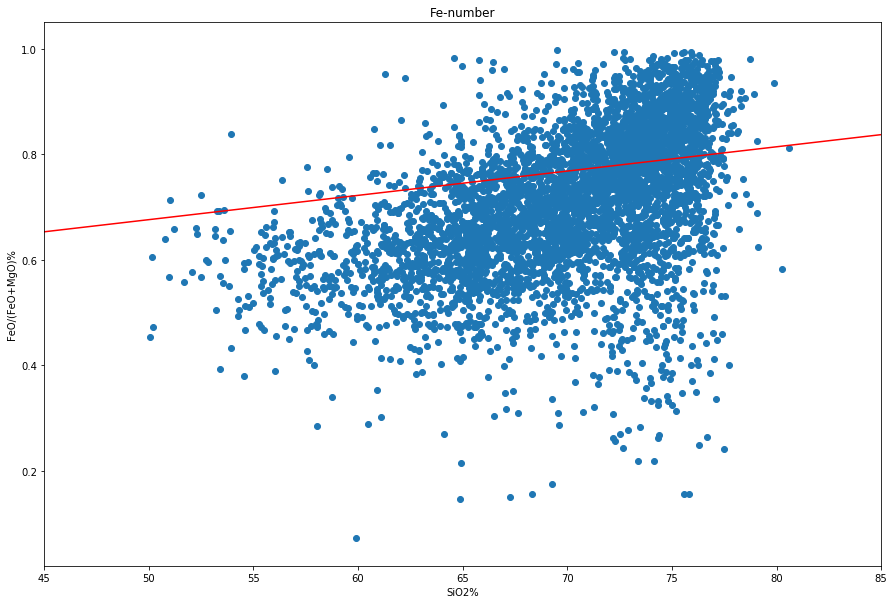

In [259]:
plt.figure(figsize=(15,10))
plt.scatter(class_major["SiO2"] , class_major["FeO/(FeO+MgO)"])
plt.plot(0.446 + 0.0046 * SiO2, 'red')
plt.xlim((45,85))
plt.ylabel('FeO/(FeO+MgO)%')
plt.xlabel('SiO2%')
plt.title('Fe-number')

In [289]:
class_major.loc[:, 'Fe-number']
class_major.iloc[:, 28].value_counts().to_excel("../_PETRO/Fe-number_counts.xlsx")

In [260]:
class_major.to_excel("../_Petro/classification_altereddata.xlsx")



## MALI (modified alkali-lime index) 

### based on alkali-lime index of Peacock (1931)

#### --> Na2O + K2O - CaO = -41.89 + 1.112 * wt% SiO2 - 0.00572 * wt% SiO2² boundary between alkalic and alkali-calcic
#### --> Na2O + K2O - CaO = -44,72 + 1.094 * wt% SiO2 - 0.00527 * wt% SiO2² boundary between alkali-calcic and calc-alkalic
#### --> Na2O + K2O - CaO = -45.36 + 1.0043 * wt% SiO2 - 0.00427 * wt% SiO2² boundary between calc-alkalic and calcic

In [261]:
class_major["Na2O+K2O-CaO"] = class_major["Na2O"] + class_major["K2O"] - class_major["CaO"]

In [262]:
class_major["al_al-calc"] = -41.89 + 1.112 * class_major["SiO2"] - (0.00572 * class_major["SiO2"] * class_major["SiO2"])
class_major["al-calc_calc-al"] = -44.72 + 1.094 * class_major["SiO2"] - (0.00527 * class_major["SiO2"] * class_major["SiO2"])
class_major["calc-al_calc"] = -45.36 + 1.0043 * class_major["SiO2"] - (0.00427 * class_major["SiO2"] * class_major["SiO2"])

class_major["al_al-calc_Bound"] = class_major["Na2O+K2O-CaO"] - class_major["al_al-calc"]
class_major["al-calc_calc-al_Bound"] = class_major["Na2O+K2O-CaO"] - class_major["al-calc_calc-al"]
class_major["calc-al_calc_Bound"] = class_major["Na2O+K2O-CaO"] - class_major["calc-al_calc"]

class_major["Mali"] = ""


In [263]:
class_major["Mali"] = np.where(class_major["calc-al_calc_Bound"] >= 0, 'calc-alkalic', 'calcic')
class_major["Mali"] = np.where(class_major["al-calc_calc-al_Bound"]  >= 0, 'alkali-calcic', class_major["Mali"] )
class_major["Mali"] = np.where(class_major["al_al-calc_Bound"] >= 0, 'alkalic', class_major["Mali"])

In [264]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,Fe-miyashiro,Fe-number,Na2O+K2O-CaO,al_al-calc,al-calc_calc-al,calc-al_calc,al_al-calc_Bound,al-calc_calc-al_Bound,calc-al_calc_Bound,Mali
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,-0.005432,magnesian,5.027431,10.577737,9.220217,7.846650,-5.550305,-4.192786,-2.819219,calcic
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,-0.231922,magnesian,7.074052,10.515286,9.140058,7.743319,-3.441234,-2.066006,-0.669267,calcic
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,0.121650,ferroan,6.757297,10.439896,9.043856,7.619998,-3.682598,-2.286558,-0.862701,calcic
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,-0.184879,magnesian,7.240044,10.281113,8.843100,7.364926,-3.041069,-1.603056,-0.124882,calcic
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,0.173076,ferroan,3.330020,10.198134,8.739104,7.233929,-6.868114,-5.409084,-3.903909,calcic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,-0.113147,magnesian,-1.885851,-0.067431,-2.645599,-5.259571,-1.818420,0.759748,3.373720,alkali-calcic
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,-0.040130,magnesian,-4.149212,-0.178652,-2.762651,-5.379150,-3.970560,-1.386561,1.229938,calc-alkalic
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,-0.205014,magnesian,-3.516987,-0.474590,-3.073786,-5.696534,-3.042397,-0.443201,2.179547,calc-alkalic
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,-0.071721,magnesian,-4.243028,-0.514812,-3.116039,-5.739583,-3.728215,-1.126989,1.496555,calc-alkalic


In [265]:
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

Text(0.5, 1.0, 'MALI')

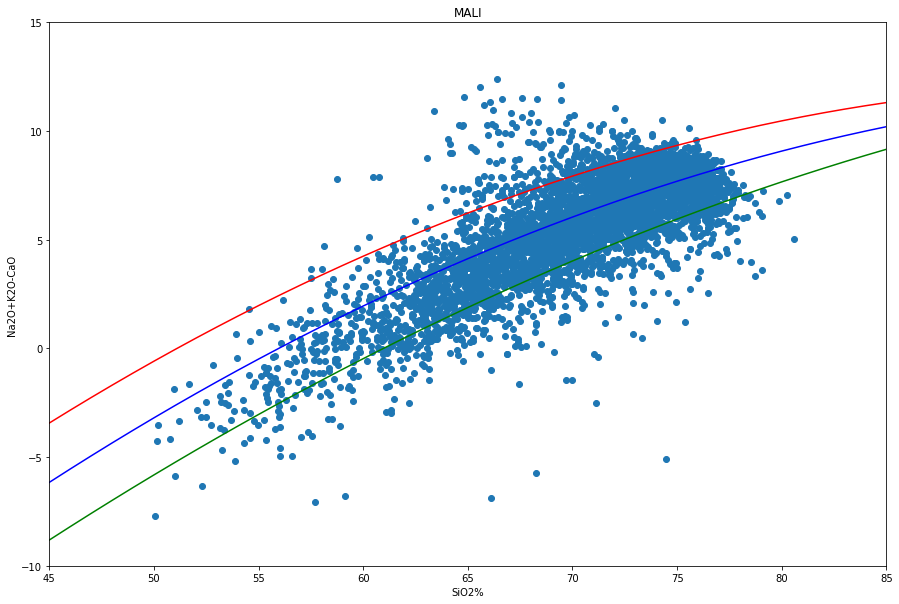

In [266]:
plt.figure(figsize=(15,10))
plt.xlim((45,85))
plt.plot(-41.89 + 1.112 * SiO2 - (0.00572 * SiO2 * SiO2), 'red')
plt.plot(-44.72 + 1.094 * SiO2 - (0.00527 * SiO2 * SiO2), 'blue')
plt.plot(-45.36 + 1.0043 * SiO2 - (0.00427 * SiO2 * SiO2), 'green')
plt.scatter(class_major["SiO2"], class_major["Na2O+K2O-CaO"])
plt.xlim((45,85))
plt.ylim((-10,15))
plt.ylabel('Na2O+K2O-CaO')
plt.xlabel('SiO2%')
plt.title('MALI')

In [290]:
class_major.loc[:, 'Fe-number']
class_major.iloc[:, 36].value_counts().to_excel("../_PETRO/MALI_counts.xlsx")

## ASI (aluminum saturation index) 

### defined as the moleular ratio Al/(Ca - 1.67P + Na +K) --> (Shand, 1943)

#### ASI > 1.0 --> peraluminous (Zen, 1988)
#### ASI < 1.0 and Na+K < molecular Al --> metaluminous 
#### ASI < 1.0 and Na+K > molecular Al --> peralkaline (Zen, 1988)

In [267]:
class_major["ASI_value"] = class_major["Al2O3"]/(class_major["CaO"] - 1.67 * class_major["P2O5"] + class_major["Na2O"] + class_major["K2O"])
class_major["Na+K-Al"] = class_major["Na2O"] + class_major["K2O"] - class_major["Al2O3"]
class_major["ASI"] = ""

In [268]:
class_major["ASI"] = np.where(class_major["ASI_value"]  < 1, 'peralkaline', 'metaluminous')
class_major["ASI"] = np.where(class_major["ASI_value"] >= 1, 'peraluminous', class_major["ASI"])

In [269]:
class_major

,Y_UTM,X_UTM,ZoneNumber,ZoneLetter,Latitude,Longitude,past_mer,Y,X,SiO2,...,al_al-calc,al-calc_calc-al,calc-al_calc,al_al-calc_Bound,al-calc_calc-al_Bound,calc-al_calc_Bound,Mali,ASI_value,Na+K-Al,ASI
1,311272.566098,4.932930e+06,54,T,"44°31'30.0""","138°37'30.0""",NaN,44.525000,138.625000,80.598504,...,10.577737,9.220217,7.846650,-5.550305,-4.192786,-2.819219,calcic,1.659236,-4.558603,peraluminous
2,656538.925786,6.008743e+06,50,U,"54°12'10.0""","119°24'0.0""",NaN,54.202778,119.400000,80.272928,...,10.515286,9.140058,7.743319,-3.441234,-2.066006,-0.669267,calcic,1.317420,-2.709211,peraluminous
3,633468.918083,6.943713e+06,56,V,"62°36'0.0""","155°36'0.0""",NaN,62.600000,155.600000,79.888045,...,10.439896,9.043856,7.619998,-3.682598,-2.286558,-0.862701,calcic,1.408170,-2.988804,peraluminous
4,448679.859182,6.828145e+06,55,V,"61°35'0.0""","146°2'0.0""",NaN,61.583333,146.033333,79.104181,...,10.281113,8.843100,7.364926,-3.041069,-1.603056,-0.124882,calcic,1.119199,-1.668487,peraluminous
5,475912.972942,7.645188e+06,58,W,"68°55'0.0""","164°24'0.0""",NaN,68.916667,164.400000,78.707753,...,10.198134,8.739104,7.233929,-6.868114,-5.409084,-3.903909,calcic,1.755439,-5.606362,peraluminous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4655,472781.240413,7.398072e+06,58,W,"66°42'0.0""","164°23'0.0""",NaN,66.700000,164.383333,50.977849,...,-0.067431,-2.645599,-5.259571,-1.818420,0.759748,3.373720,alkali-calcic,1.476676,-13.280782,peraluminous
4656,658620.016371,5.200790e+06,53,T,"46°56'30.0""","137°5'3.0""",NaN,46.941667,137.084167,50.768003,...,-0.178652,-2.762651,-5.379150,-3.970560,-1.386561,1.229938,calc-alkalic,1.440880,-13.425095,peraluminous
4657,335447.154681,6.454395e+06,54,V,"58°12'0.0""","138°12'0.0""",NaN,58.200000,138.200000,50.214207,...,-0.474590,-3.073786,-5.696534,-3.042397,-0.443201,2.179547,calc-alkalic,1.432647,-13.061672,peraluminous
4658,528075.823175,6.746190e+06,55,V,"60°51'0.0""","147°31'0.0""",NaN,60.850000,147.516667,50.139442,...,-0.514812,-3.116039,-5.739583,-3.728215,-1.126989,1.496555,calc-alkalic,1.595876,-16.792829,peraluminous


In [ ]:
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

# cleaning excel file

In [281]:
class_major["classificated"] = class_major[['Fe-number', 'Mali', 'ASI']].agg('-'.join, axis=1)
class_major.to_excel("../_Petro/classification_altereddata.xlsx")

In [282]:
classification = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols = lambda column : column not in ["FeO/(FeO+MgO)", "Miyashiro value", "Fe-miyashiro", "Na2O+K2O-CaO", "al_al-calc", "al-calc_calc-al", "calc-al_calc", "al_al-calc_Bound", "al-calc_calc-al_Bound", "calc-al_calc_Bound", "ASI_value", "Na+K-Al"])

In [283]:
classification.to_excel("../_Petro/classificated.xlsx")

In [286]:
classification.loc[:, 'classificated']
classification.iloc[:, 28].value_counts().to_excel("../_PETRO/classificated_counts.xlsx")

#### gives 12 different classes

# remarks


###### everything has to be checked, especially the ASI where ther are only a small amount of non-peraluminous datapoints. There are 12 different classes, but there i also a class that should not exist according to the paper --> have to take a look